In [1]:
import kuzushiji

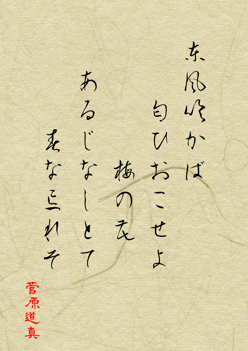

In [2]:
    text = "東風吹かば 匂ひおこせよ 梅の花 あるじなしとて 春な忘れそ"
    generator = kuzushiji.Generator(
        text,
        font_path="/code/font/KouzanBrushFontSousyo.ttf",
        image_path="/code/background/japanese-paper_00096.jpg",
    )
    generator.draw_text()
    # 署名を入力してください
    name = "菅原道真"
    if name != "":
        generator.sign(
            name,
            "/code/font/aoyagireisyosimo_ttf_2_01.ttf",
        )
    generator.rescale(0.1)
    # ファイル名の入力
    path = ""
    output_path = generator.save(path)
    generator.image